In [2]:
import torch
# x = torch.tensor([1.,3.,6.,10.])
# y = torch.tensor([2.,7.,9.,13.])
x = torch.tensor([0., 1., 2., 3., 4., 5., 6., 7., 8.])
y = torch.tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.])
print(x)
print(y)
h =torch.stack((x,y))
h

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8.])
tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.])


tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
        [10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.]])

In [3]:
x = torch.stack([torch.arange(0,10)]*10).float()
print(x)

tx = torch.stack([x.t()]*3)
ty = torch.stack([x]*3)
tx.shape
print(tx[1,:1:1])
print(ty[1,:1:1])

tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])


In [4]:
x = torch.arange(12).reshape(2,2,3)

print(x)
x[:1,0]

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])


tensor([[0, 1, 2]])

In [5]:
# torch.clamp的用法
# 将值限制在[min,max]之间
import torch
x = torch.arange(-5,5)
h = x.clamp(min=-1,max=1)
h

tensor([-1, -1, -1, -1, -1,  0,  1,  1,  1,  1])

In [6]:
import torch
x = torch.arange(0,12).reshape(2,2,3)
print(x.shape)
# 在dim = 0 处添加一个维度
x = x.unsqueeze(0)
print(x.shape)
# 减少一个维度
x = x.squeeze(0)
print(x.shape)
x = x.reshape(3,2,2)
x=x[:-1]
print(x)

torch.Size([2, 2, 3])
torch.Size([1, 2, 2, 3])
torch.Size([2, 2, 3])
tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])


200
['/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0041_129625.jpg', '/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0024_129779.jpg', '/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0048_129546.jpg', '/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0059_129896.jpg', '/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0016_129791.jpg', '/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0053_129501.jpg', '/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0012_129518.jpg', '/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0038_129830.jpg', '/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0032_129491.jpg', '/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0066_129559.jpg', '/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0063_129774.jpg', '/data0/hwl_data/FGVC/CUB-1/train/135.Bank_Swallow/Bank_Swallow_0054_129743.jpg', '/data0/hwl

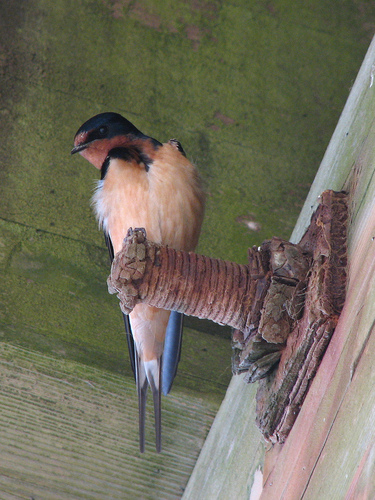

In [7]:
train_path = '/data0/hwl_data/FGVC/CUB-1/train'
import os
from PIL import Image

img = os.listdir(train_path)
img_path = [os.path.join(train_path,img) for img in os.listdir(train_path)]
# 每个图像的路径
fin_path =[]
# print(img_path)
for img_name in img_path:
    fin_path.append([os.path.join(img_name,img) for img in os.listdir(img_name)]) # generate ==>[]

print(len(fin_path))
print(fin_path[0])

img = Image.open(fin_path[0][1])
img

In [2]:
import torch.utils.data as data
import torchvision.transforms as transforms
import numpy as np


# 定义一个loader
class CUB_loader(data.Dataset):
    def __init__(self,root_path,split='train',transform=None):

        # 均值，方差
        std = [1. / 255.]
        means = [109.97 / 255., 127.34 / 255., 123.88 / 255.]
        normal = transforms.Normalize(mean=means,std=std*3)
        # 训练集
        if transform is None and  split.lower() =='train':
            self.transform = transforms.Compose([
                transforms.Resize(448),transforms.RandomCrop([448, 448]),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                normal
            ])
        # 测试集
        elif transform is None and split.lower() == 'test':
            self.transform = transforms.Compose([
                transforms.Resize(448),
                transforms.CenterCrop(448),
                transforms.ToTensor(),
                normal])
        else:
            print(" [*] Warning: transform is not None, Recomend to use defualt")
            pass

        # 数据载入
        self._imgpath = []
        self._imglabel =[]


    def __getitem__(self,index):
        img = Image.open(self._imgpath[index])
        img_array = np.array(img)
        # 数据集中有图片的数据mode='L'
        if len(img_array.shape) == 2:
            img = img.convert("RGB")
            img_array = np.array(img)

            print(img_array.shape)
        img = self.transform(img)
        cls = self._imglabel[index]
        return img, cls
    def __len__(self):
        return len(self._imglabel)


/home/yy/anaconda3/envs/pytorch_gpu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


使用`ImageFolder`打开数据集

In [3]:

from torchvision.datasets import ImageFolder
path = '/data0/hwl_data/FGVC/CUB-1/train/'
dataset = ImageFolder(path)
# [indx] [image:0/label:1] 
dataset[1][1],dataset[100][1]

(0, 2)

In [4]:
# 查看数据集的路径和label
dataset.imgs

[('/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0003_796136.jpg',
  0),
 ('/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0007_796138.jpg',
  0),
 ('/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0008_796083.jpg',
  0),
 ('/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg',
  0),
 ('/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg',
  0),
 ('/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0017_796098.jpg',
  0),
 ('/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg',
  0),
 ('/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0024_796089.jpg',
  0),
 ('/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg',
  0),
 ('/data0/hwl_

In [7]:
img = dataset[1][0]
img.size()[2]

TypeError: 'tuple' object is not callable

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

# 使用的是 vgg19的架构
from models import vgg19_bn
# test
import torchvision.transforms as transforms
from PIL import Image

print(" [*] RACNN forward test...")
# x = torch.randn([2, 3, 448, 448])
# 用image 来测试
path = '/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0003_796136.jpg'
x = Image.open(path).convert('RGB')
transform = transforms.Compose([
            transforms.Resize(448),
            transforms.RandomCrop([448, 448]),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
        ])
img_ten = transform(x).unsqueeze(0)
#
net = RACNN(num_classes=200)
net = net.to(device)
#[logits1, logits2, logits3], [conv5_4, conv5_4_A], [atten1, atten2], [scaledA_x, scaledAA_x]
#logits, conv5s, attens,scaleds = net(x.to(device))
logits, conv5s, attens,scaleds = net(img_ten.to(device))
modify_img = scaleds[0]
print(modify_img)
print(" [*] logits[0]:", logits[0].size())
from Loss import multitask_loss, pairwise_ranking_loss
# 转为 GPU
target_cls = torch.LongTensor([100, 150]).to(device)
preds = []
for i in range(len(target_cls)):
    pred = [logit[i][target_cls[i]] for logit in logits]
    preds.append(pred)
loss_cls = multitask_loss(logits, target_cls)
loss_rank = pairwise_ranking_loss(preds)
print(" [*] Loss cls:", loss_cls)   # [tensor(5.3305, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(5.2256, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(5.3766, device='cuda:0', grad_fn=<NllLossBackward0>)]
print(" [*] Loss rank:", loss_rank) # tensor(0.2027, device='cuda:0', grad_fn=<MeanBackward0>)
print(" [*] Backward test")
loss = loss_cls + loss_rank
print('[*] loss:',loss)
loss.backward()
print(" [*] Backward done")

ModuleNotFoundError: No module named 'vgg'

In [15]:
# 划分列表
split_list = ['1 0\n', '2 1\n', '3 0\n', '4 1\n', '5 1\n']
#获取 index 和 是否是训练集
train_list=[]
test_list=[]
for  i in split_list:
    index,istrain = i.strip().split()
    # 1 表示是训练集
    if int(istrain) == 1:
        train_list.append(int(index))
    else:
        test_list.append(int(index))
print(train_list)
print(test_list)

[2, 4, 5]
[1, 3]


注意力区域的裁剪

In [17]:
import torch
# 注意力裁剪
class AttentionCropFunction(torch.autograd.Function):
    @staticmethod
    def forward(self, images, locs):
        # logistic function k=10
        h = lambda x: 1. / (1. + torch.exp(-10. * x))
        # img_weight
        in_size = images.size()[2]
        # 生成 in_size*in_size 维度的 0~in_size 的矩阵 
        #[1,2,3,...in_size]
        #[1,2,3,...in_size]
        #[1,2,3,...in_size]
        unit = torch.stack([torch.arange(0, in_size)] * in_size).float()
        # 模拟 3 通道 x , y=x.t 的值
        x = torch.stack([unit.t()] * 3)
        y = torch.stack([unit] * 3)
        if isinstance(images, torch.cuda.FloatTensor):
            #    x, y = x.cuda(), y.cuda()
            x, y = x.to(device), y.to(device)

        in_size = images.size()[2]
        ret = []
        for i in range(images.size(0)):  # 迭代通道
            '''
            loc=[[tx,ty,tl]
                [tx,ty,tl]
                [tx,ty,tl]]
            '''
            tx, ty, tl = locs[i][0], locs[i][1], locs[i][2]
            # 限制图像的框
            tl = tl if tl > (in_size / 3) else in_size / 3
            tx = tx if tx > tl else tl      # 确保x的位置大于中间长度
            tx = tx if tx < in_size - tl else in_size - tl # 确保框在中间
            ty = ty if ty > tl else tl
            ty = ty if ty < in_size - tl else in_size - tl
            # 宽度偏移
            w_off = int(tx - tl) if (tx - tl) > 0 else 0
            h_off = int(ty - tl) if (ty - tl) > 0 else 0
            # 宽度相对 x 坐标的位置
            w_end = int(tx + tl) if (tx + tl) < in_size else in_size
            h_end = int(ty + tl) if (ty + tl) < in_size else in_size
            # attention mask(判断点是否在APN的区域中)
            mk = (h(x - w_off) - h(x - w_end)) * (h(y - h_off) - h(y - h_end))
            
            # crop attended region
            xatt = images[i] * mk
            # attention region
            #print('xatt_shape:',xatt.shape)
            xatt_cropped = xatt[:, w_off:w_end, h_off:h_end] # 注意力裁剪区域
            #print('xatt_cropped',xatt_cropped.shape)
            before_upsample = Variable(xatt_cropped.unsqueeze(0)) # 增加一个维度
            #print('before_upsample shape',before_upsample.shape)
            xamp = F.interpolate(before_upsample, size=(224, 224), mode='bilinear', align_corners=True) # 双线性插值来放大 attend region
            ret.append(xamp.data.squeeze())

        ret_tensor = torch.stack(ret)
        self.save_for_backward(images, ret_tensor)  # 保存图像和映射map用于backward
        return ret_tensor


tensor([[0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.]])

`F.smooth_l1_loss`用法
$$
z_{i}=\begin{cases}
 0.5(x_{i}-y_{i}^{2}) & \text{ if } |x_{i}-y_{i}| < 1
  \\
  |x_{i}-y_{i}|-0.5& \text{ otherwise } 
\end{cases}
$$


In [33]:
import torch.nn.functional as F
input = torch.Tensor([1,5])
target = torch.Tensor([4,1])

loss = F.smooth_l1_loss(input,target)
loss

tensor(3.)

In [26]:
#Image.size()
# width height

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

#### `self.save_for_backward`的使用

在`backward`中需要使用`forward`的值，则通过`self.save_for_backward`函数，暂时保存，在`self.saved_tensors`取出(`saved_variables`不再使用)

In [49]:
# 例子，实现ReLU
from torch.autograd import Function
class ReLUF(Function):
    def forward(self,input):
        self.save_for_backward(input)
        output = input.clamp(min=0)
        return output
    def backward(self,output_grad):
        # 克隆forward 保存的值
        input = self.saved_tensors[0]
        input_grad = output_grad.clone() # output_grad 反向传播传入的参数
        input_grad[input<0] = 0 # 与clamp(min=0)功能一样
        return input_grad
    
from torch.autograd import Variable

torch.manual_seed(1111)
a = torch.randn(2,3)
va = Variable(a,requires_grad=True)
vb = ReLUF.apply(va)
print('va.data:\n{} \nvb.data:\n{}'.format(va.data,vb.data))
vb.backward(torch.ones(va.size()))
print('backward')
print('va.data:\n{} \nvb.data:\n{}'.format(va.data,vb.data))


va.data:
tensor([[-0.4078, -0.9385, -1.2721],
        [-1.5061,  0.8749,  0.7828]]) 
vb.data:
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.8749, 0.7828]])
backward
va.data:
tensor([[-0.4078, -0.9385, -1.2721],
        [-1.5061,  0.8749,  0.7828]]) 
vb.data:
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.8749, 0.7828]])


In [53]:
print(torch.Tensor(2,3))

tensor([[4.1053e-35, 0.0000e+00, 3.6105e-35],
        [0.0000e+00, 1.1210e-43, 0.0000e+00]])


In [72]:
in_size = 224
#         show_image(inputs.cpu().data[0])
#         show_image(ret_tensor.cpu().data[0])
#         plt.imshow(norm[0].cpu().numpy(), cmap='gray')

# 初始化值
x = torch.stack([torch.arange(0, in_size)] * in_size).t()
y = x.t()
long_size = (in_size / 3 * 2)
short_size = (in_size / 3)
mx = (x >= long_size).float() - (x < short_size).float()
my = (y >= long_size).float() - (y < short_size).float()

In [73]:
# mx = (x>=long_size).float()
my

tensor([[-1., -1., -1.,  ...,  1.,  1.,  1.],
        [-1., -1., -1.,  ...,  1.,  1.,  1.],
        [-1., -1., -1.,  ...,  1.,  1.,  1.],
        ...,
        [-1., -1., -1.,  ...,  1.,  1.,  1.],
        [-1., -1., -1.,  ...,  1.,  1.,  1.],
        [-1., -1., -1.,  ...,  1.,  1.,  1.]])

In [74]:
in_size = 9
x = torch.stack([torch.arange(0, in_size)] * in_size).t()
y = x.t()
long_size = (in_size / 3 * 2)
short_size = (in_size / 3)

In [66]:
x1 = (x >= long_size).float()
x1

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [84]:
x = torch.stack([torch.arange(0, in_size)] * in_size).t()
x = (x < short_size).float()
x

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [85]:
mx=x1-x
mx

tensor([[-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [75]:
my = (y >= long_size).float() - (y < short_size).float()
my

tensor([[-1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.],
        [-1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.],
        [-1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.],
        [-1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.],
        [-1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.],
        [-1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.],
        [-1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.],
        [-1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.],
        [-1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.]])

In [76]:
ml = (((x < short_size) + (x >= long_size) + (y < short_size) + (y >= long_size)) > 0).float() * 2 - 1

In [77]:
ml

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.],
        [ 1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.],
        [ 1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [82]:
mx_batch = torch.stack([mx.float()]*3)
mx_batch

tensor([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-2., -2., -2., -2., -2., -2., -2., -2., -2.],
         [-3., -3., -3., -3., -3., -3., -3., -3., -3.],
         [-4., -4., -4., -4., -4., -4., -4., -4., -4.],
         [-5., -5., -5., -5., -5., -5., -5., -5., -5.],
         [-5., -5., -5., -5., -5., -5., -5., -5., -5.],
         [-6., -6., -6., -6., -6., -6., -6., -6., -6.],
         [-7., -7., -7., -7., -7., -7., -7., -7., -7.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-2., -2., -2., -2., -2., -2., -2., -2., -2.],
         [-3., -3., -3., -3., -3., -3., -3., -3., -3.],
         [-4., -4., -4., -4., -4., -4., -4., -4., -4.],
         [-5., -5., -5., -5., -5., -5., -5., -5., -5.],
         [-5., -5., -5., -5., -5., -5., -5., -5., -5.],
         [-6., -6., -6., -6., -6., -6., -6., -6., -6.],
         [-7., -7., -7., -7., -7., -7., -7., -

In [88]:
x = torch.Tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
print(x,'\n',x.shape)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]) 
 torch.Size([3, 3])


In [90]:
temp_sum = x.sum(dim=0)
fin_sum = temp_sum.sum(dim=0)
print(temp_sum)
print(fin_sum)

tensor([12., 15., 18.])
tensor(45.)


In [98]:
x = 1e-7
print(x)

1e-07


In [109]:
x = torch.Tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
x[:-1].shape

torch.Size([2, 3])

tensor(8)

torch.return_types.max(
values=tensor(9.),
indices=tensor(8))

**interpolate**

函数常用于图像的放大(上采样操作),在细粒度识别的领域中，注意力图有时候会对特征图进行裁剪操作，将有用的部分裁剪出来，但是裁剪后得到的区域小于原始特征图，使用本函数可以在**保证图像不丢失**的情况下，放大图像，从而放大图像细节

In [2]:
import torch.nn.functional as F
import torch
x = torch.randn(size=(512,28,28))
x_map = F.interpolate(x.unsqueeze(0),size=[448,448])
x_mean = x_map.mean(0)
x_mean.shape

torch.Size([512, 448, 448])

In [5]:
for i in list(x_mean.size())[::-1]:
    print(i)
   

448
448
512


In [8]:
x = torch.stack([torch.arange(0,24)]*10)

x

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,